# Sales Prediction

### Importing necessary libraries

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Loading the data

In [27]:
df = pd.read_csv("advertising.csv", index_col=[0])

In [28]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [29]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [30]:
df.shape

(200, 4)

In [31]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


- From above output, we can observe all the features are having numerical data-types
- All the features are having correct data-types. So we don't have to do any changes

In [32]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- None of the features are having missing values

In [33]:
df.duplicated().sum()

0

- There are no duplicate records present in our dataset.

### Exploratory Data Analysis

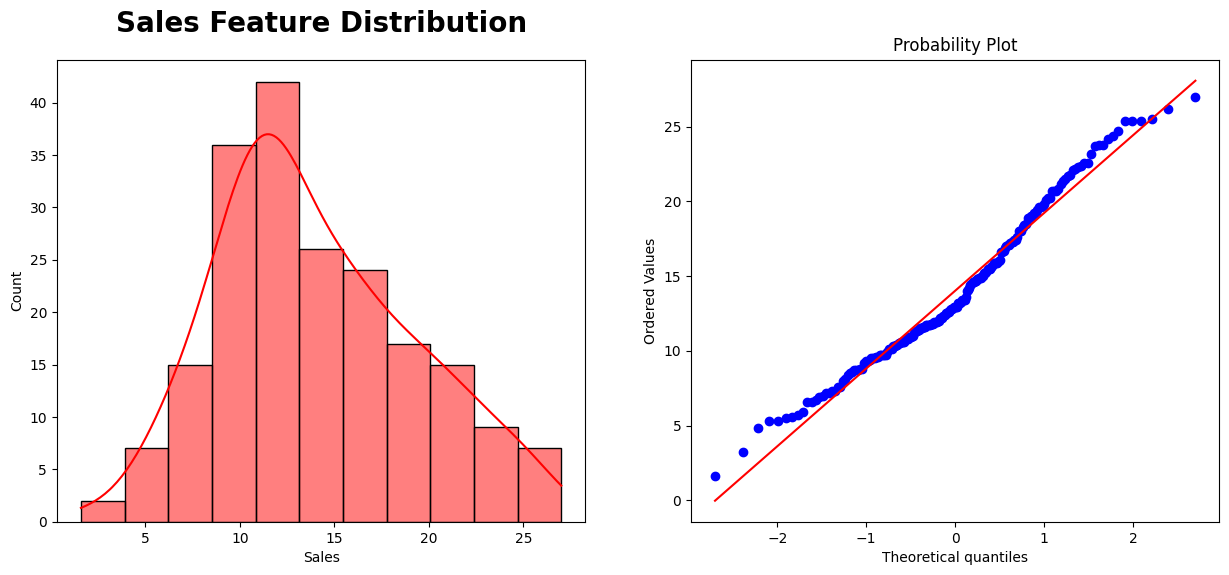

In [34]:
# visualizing our target("Sales Feature")

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df["Sales"],color="red",kde=True)
plt.title("Sales Feature Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
stats.probplot(df["Sales"],dist="norm",plot=pylab)
plt.show()

- ```Sales Feature``` is having a kind of Gamma Distribution
- We don't have to perform any Transformation steps

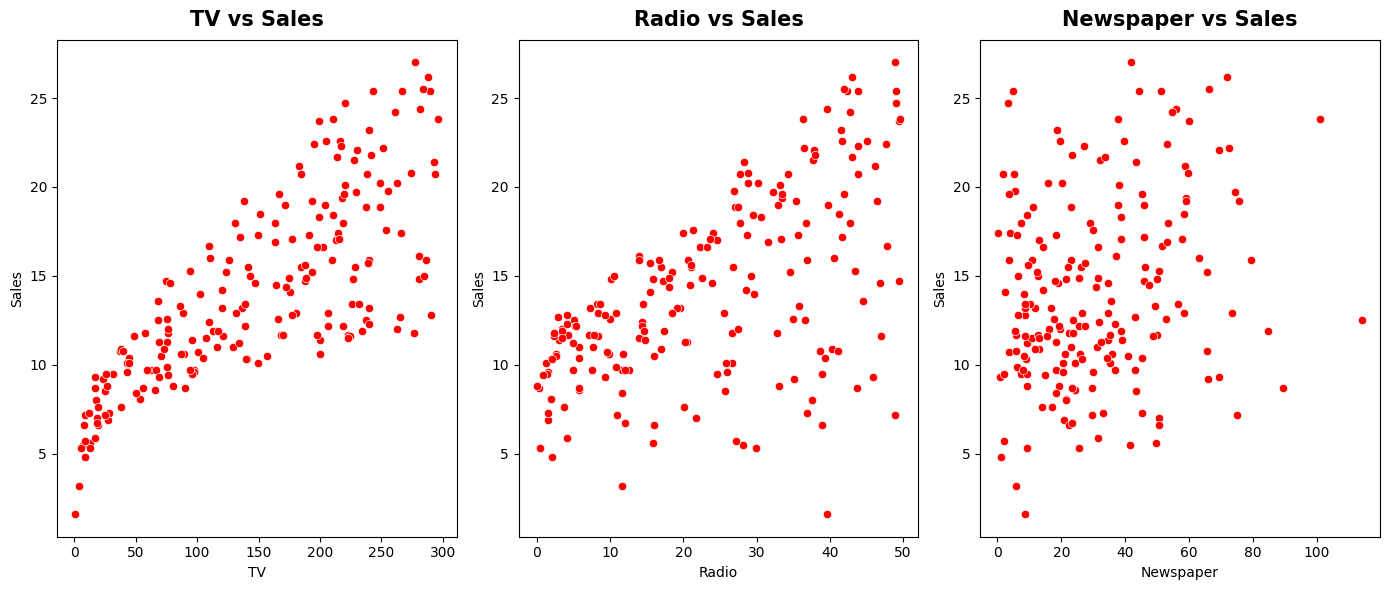

In [35]:
# visualizing advertizing features

cols = ["TV","Radio","Newspaper"]
p = 1

plt.figure(figsize=(14,6))
for col in cols:
    plt.subplot(1,3,p)
    sns.scatterplot(data= df,x=col, y="Sales", color="red")
    plt.title(f"{col} vs Sales",fontweight="black",pad=10,fontsize=15)
    plt.tight_layout()
    p+=1

Observation:

- From TV vs Sales and Radio vs Sales visualization, we can clearly see that product sales are dependent on both advertisements.
- From Newspaper vs Sales visualization, we can clearly see that the product sales is not at all dependent on Newspaper advertisement as the data-points are all scattered.

Now, let's quantify how much product sales are dependent on TV, Radio and Newspaper advertisement.

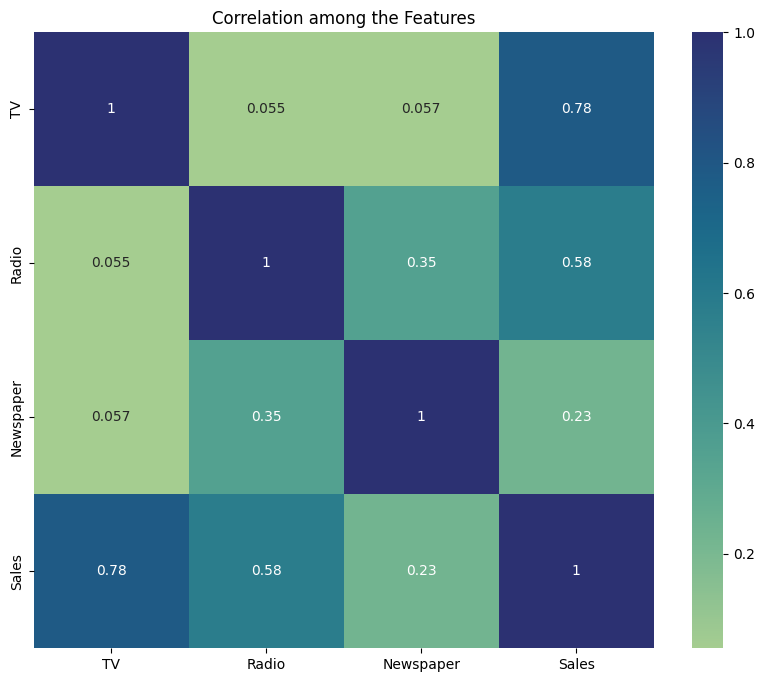

In [36]:
# checking correlation of features

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.title("Correlation among the Features")
plt.show()

Observation:

- We can observe that TV Feature has highest correlation with Sales Feature i.e., our Target Feature
- Radio Feature is having a positive correlation with our Target Feature but less than TV Feature
- Newspaper Feature is having very less correlation with out target Feature.

Insights:

- We see from our observations that sales is mostly dependent on TV advertisement and radio advertisement.
- So we can drop Newspaper Feature before training our model.

### Data Pre-Processing

In [37]:
# selecting label and target variable for model training

x = df.drop(columns=["Sales","Newspaper"])
y = df[["Sales"]]

In [38]:
x.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [39]:
y.head()

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=22)

### Model Prediction

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [43]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [44]:
print("Accuracy on Training Data: ", r2_score(y_train,pred_train)*100)

Accuracy on Training Data:  88.997469309486


In [45]:
print("Accuracy on Testing Data: ", r2_score(y_test,pred_test)*100)

Accuracy on Testing Data:  91.8610042538374


Observation:

- We can clearly observe that we got an accuracy of 89 on training data and 92 on testing data
- So we can conclude that our model is having a kind of best fitting

Mean Squared Error

In [46]:
mse = mean_squared_error(y_test, pred_test)
print(mse)

2.4566826150174688


In [47]:
rmse = mse ** 0.5
print(rmse)

1.567380813656167


Observation:

- Lower MSE and RMSE values indicate that the model will perform better while predicting future sales.